In [1]:
import numpy as np
import cvxpy as cvx
from copy import copy

from pympc.geometry.polytope import Polytope
import matplotlib.pyplot as plt

In [2]:
def maximum_volume_simplex_inscribed_polytope(A, b):
    n, m = A.shape
    S = cvx.Variable(m, m)
    v = cvx.Variable(m, m+1)
    objective = cvx.Maximize(cvx.log_det(S))
    distance_vertices = [v[:,i+1] - v[:,0] == S[:,i] for i in range(m)]
    vertices_in_polyhedron = [A*v[:,i] <= b for i in range(m+1)]
    prob = cvx.Problem(objective, distance_vertices + vertices_in_polyhedron)
    result = prob.solve()
    v = v.value
    print S.value
    return v

In [3]:
n_var = 2
n_cons = 10
A = np.random.randn(n_cons, n_var)
b = np.random.rand(n_cons, 1)
v = maximum_volume_simplex_inscribed_polytope(copy(A), copy(b))

[[ 0.47300241  0.18230041]
 [ 0.18230041  0.25180572]]


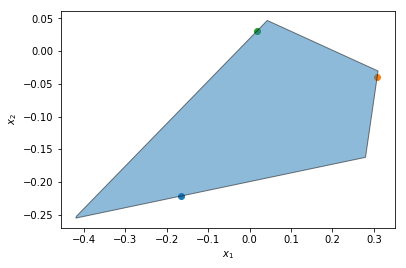

In [4]:
p = Polytope(A, b)
p.assemble()
p.plot(alpha=.5)
for i in range(v.shape[1]):
    plt.scatter(v[0,i], v[1,i])
plt.show()

In [5]:
print v

[[-0.16474095  0.30826146  0.01755946]
 [-0.22127152 -0.03897112  0.03053419]]
